In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 1. PATH SETUP (matches your folder layout)
# Your notebook is in: project/notebooks/  So go UP ONE LEVEL to reach the project root
# In computer-speak, .. means "go up one level." It refers to the parent folder of wherever your script or notebook is currently running.
#.resolve() forces Python to look at the actual address on your hard drive. It turns a relative path (like "one floor up") 
# into an Absolute Path (like C:\Users\glori\Documents\...).
BASE_DIR = Path("..").resolve()
DATA_DIR = BASE_DIR / "data" / "raw"

train_dir = DATA_DIR / "train"
validate_dir = DATA_DIR / "validate"
test_dir = DATA_DIR / "test"

classes = ["edible", "poisonous"]

# count images per split + class
rows = []

# .glob("*")
# .glob("*") returns a generator of Path objects, one for each file. Example output (conceptually):
#data/raw/train/edible/Ganoderma_lucidum_000020_1.jpg
#data/raw/train/edible/Hericium_erinaceus_000016_1.
# [f for f in ...] is a list comprehension. It takes the generator from .glob("*") and turns it into a list of Path objects. So now you have a list like:
#[
#    PosixPath('.../image1.jpg'),
#    PosixPath('.../image2.png'),
#    PosixPath('.../image3.jpeg'),
#    ...
#]
for split, dir_path in [("train", train_dir), ("validate", validate_dir), ("test", test_dir)]:
    edible_count = len([f for f in (dir_path/"edible").glob("*")
                        if f.suffix.lower() in [".jpg", "jpeg", "png"]])
    
    poisonous_count = len([f for f in (dir_path/"poisonous").glob("*")
                        if f.suffix.lower() in [".jpg", "jpeg", "png"]])
    
    rows.append({
        "split": split,
        "edible": edible_count,
        "poisonous": poisonous_count,
        "total": edible_count + poisonous_count
    })

# OUTSIDE loop! 
df = pd.DataFrame(rows)
df

,split,edible,poisonous,total
0,train,1117,1016,2133
1,validate,134,125,259
2,test,142,128,270


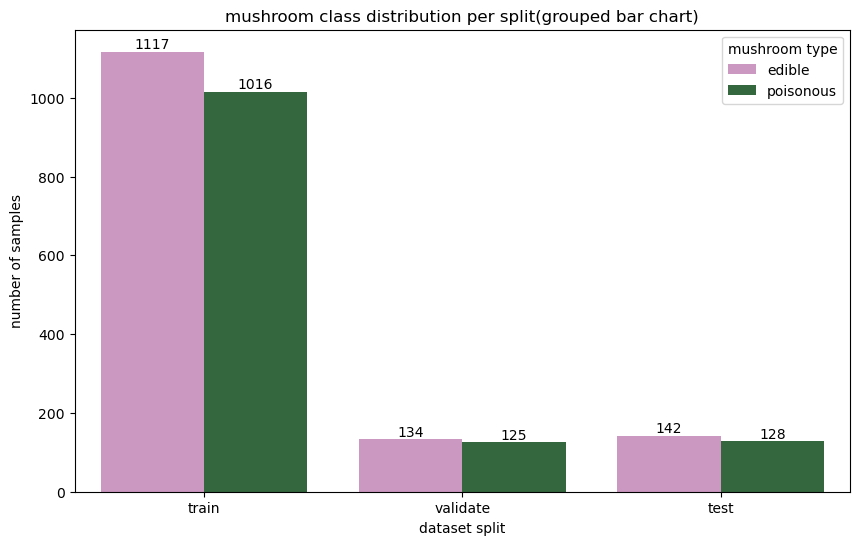

In [24]:
#BEFORE melt (wide)
#AFTER melt (long):
#split     mushroom type   number of samples
#train     edible          1117
#train     poisonous       1016
df_melted = df.melt(
    id_vars='split', # Keep `split` column as-is 
    value_vars=['edible', 'poisonous'], # These two columns get unpivoted into rows
    var_name='mushroom type', # The new column that holds the old column names
    value_name='number of samples' # The new column that holds the actual counts
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='split', y='number of samples', hue='mushroom type', palette='cubehelix_r')

for container in ax.containers:
    ax.bar_label(container)

plt.legend(title="mushroom type")
plt.title('mushroom class distribution per split(grouped bar chart)')
plt.xlabel('dataset split')
plt.ylabel('number of samples')
plt.show()